In [ ]:
#Waiter Tips Analysis and Prediction using LinearRegression,DecisionTreeRegressor,RandomForestRegressor and SVR

In [ ]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import plotly.express as px
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error, median_absolute_error

In [ ]:
df = pd.read_csv('/content/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
figure = px.pie(df, values='tip', names='sex', title='Tip Distribution by Gender',hole=0.5)
figure.show()

In [ ]:
figure = px.pie(df, values='tip', names='smoker', title='Tip Distribution by Smoker',hole=0.5)
figure.show()

In [ ]:
figure = px.pie(df, values='tip', names='day', title='Tip Distribution by Smoker',hole=0.5)
figure.show()

In [ ]:
df['sex'] = df['sex'].map({'Female': 0, 'Male': 1})
df['smoker'] = df['smoker'].map({'No': 0, 'Yes': 1})
df['day'] = df['day'].map({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})
df['time'] = df['time'].map({'Lunch': 0, 'Dinner': 1})
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [ ]:
x=df.drop(['tip'],axis=1)
y=df['tip']

In [ ]:
print (x.shape)
print (y.shape)

(244, 6)
(244,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(195, 6)
(49, 6)
(195,)
(49,)


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr.score(x_train, y_train)

0.45653112545009544

In [ ]:
lr.score(x_test, y_test)

0.44293996874898955

In [ ]:
y_pred = lr.predict(x_test)
print(y_pred)

[2.95915033 1.9793852  3.93355525 3.81512843 2.17478172 2.65950784
 3.65751199 2.30684737 2.5469726  2.27028847 2.87845875 2.10446382
 2.13402126 2.33746574 1.84729628 3.12055033 2.97055543 3.18916799
 2.61631688 5.73865153 3.48064358 3.26948544 2.23303951 1.98924641
 3.15115427 2.25680834 2.12104595 3.26905178 3.17236483 6.62813881
 4.9784413  1.6371344  3.23322391 2.82236266 2.96117781 3.86625614
 1.97848176 5.48228412 2.37106691 3.04713105 2.07990929 2.49950599
 3.41299197 2.3340929  1.94813896 0.93957882 1.88172086 3.08438206
 1.86676908]


In [ ]:
original_values=scaler.inverse_transform(x_test)
print(original_values)

[[1.98200000e+01 1.00000000e+00 0.00000000e+00 2.00000000e+00
  1.00000000e+00 2.00000000e+00]
 [8.77000000e+00 1.00000000e+00 0.00000000e+00 3.00000000e+00
  1.00000000e+00 2.00000000e+00]
 [2.45500000e+01 1.00000000e+00 0.00000000e+00 3.00000000e+00
  1.00000000e+00 4.00000000e+00]
 [2.58900000e+01 1.00000000e+00 1.00000000e+00 2.00000000e+00
  1.00000000e+00 4.00000000e+00]
 [1.30000000e+01 0.00000000e+00 1.00000000e+00 2.22044605e-16
  0.00000000e+00 2.00000000e+00]
 [1.78900000e+01 1.00000000e+00 1.00000000e+00 3.00000000e+00
  1.00000000e+00 2.00000000e+00]
 [2.84400000e+01 1.00000000e+00 1.00000000e+00 2.22044605e-16
  0.00000000e+00 2.00000000e+00]
 [1.24800000e+01 0.00000000e+00 0.00000000e+00 2.22044605e-16
  0.00000000e+00 2.00000000e+00]
 [1.47800000e+01 1.00000000e+00 0.00000000e+00 3.00000000e+00
  1.00000000e+00 2.00000000e+00]
 [1.53800000e+01 0.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 2.00000000e+00]
 [1.82900000e+01 1.00000000e+00 0.00000000e+00 3.0

In [ ]:
print(r2_score(y_test, y_pred))

0.44293996874898955


In [ ]:
print(mean_absolute_error(y_test, y_pred))

0.6685728160722875


In [ ]:
print(mean_squared_error(y_test, y_pred))

0.6963090766605352


In [ ]:
print(root_mean_squared_error(y_test, y_pred))

0.8344513626692303


In [ ]:
print(median_absolute_error(y_test, y_pred))

0.6340212576782314


In [ ]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.8344513626692303


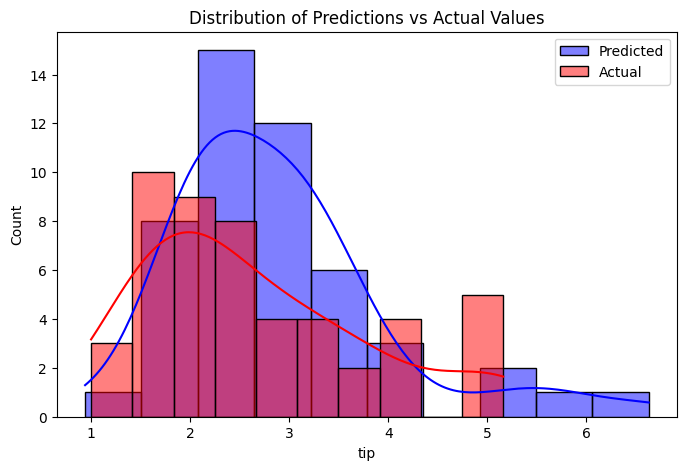

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test, color='red', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.show()

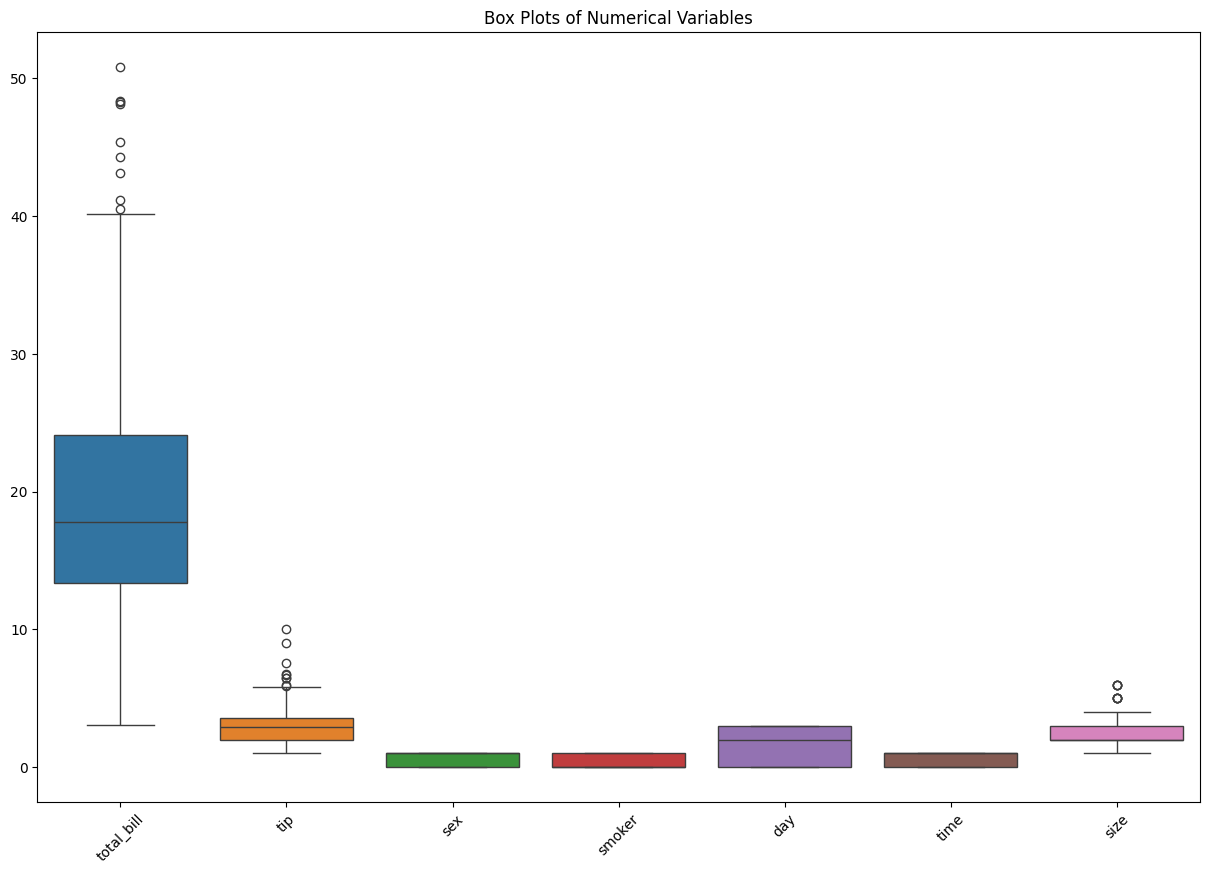

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Box Plots of Numerical Variables")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#DecisionTreeRegressor

In [ ]:
model=DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
model.score(x_train, y_train)

1.0

In [ ]:
model.score(x_test, y_test)

0.09072201305272742

In [ ]:
y_predL_dc=model.predict(x_test)
print(y_predL_dc)

[2.01 1.32 3.5  2.   2.   3.08 5.   1.8  2.5  3.48 3.   2.   2.   2.09
 1.25 1.5  3.76 3.5  2.   7.58 3.61 4.06 2.2  1.25 3.5  3.39 2.5  4.29
 2.   6.73 4.67 1.   1.75 4.19 1.01 3.61 2.2  4.73 2.   3.48 2.   2.5
 3.6  1.66 2.   1.   2.   3.   2.  ]


In [ ]:
original_values_dc=scaler.inverse_transform(x_test)
print(original_values_dc)

[[1.98200000e+01 1.00000000e+00 0.00000000e+00 2.00000000e+00
  1.00000000e+00 2.00000000e+00]
 [8.77000000e+00 1.00000000e+00 0.00000000e+00 3.00000000e+00
  1.00000000e+00 2.00000000e+00]
 [2.45500000e+01 1.00000000e+00 0.00000000e+00 3.00000000e+00
  1.00000000e+00 4.00000000e+00]
 [2.58900000e+01 1.00000000e+00 1.00000000e+00 2.00000000e+00
  1.00000000e+00 4.00000000e+00]
 [1.30000000e+01 0.00000000e+00 1.00000000e+00 2.22044605e-16
  0.00000000e+00 2.00000000e+00]
 [1.78900000e+01 1.00000000e+00 1.00000000e+00 3.00000000e+00
  1.00000000e+00 2.00000000e+00]
 [2.84400000e+01 1.00000000e+00 1.00000000e+00 2.22044605e-16
  0.00000000e+00 2.00000000e+00]
 [1.24800000e+01 0.00000000e+00 0.00000000e+00 2.22044605e-16
  0.00000000e+00 2.00000000e+00]
 [1.47800000e+01 1.00000000e+00 0.00000000e+00 3.00000000e+00
  1.00000000e+00 2.00000000e+00]
 [1.53800000e+01 0.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 2.00000000e+00]
 [1.82900000e+01 1.00000000e+00 0.00000000e+00 3.0

In [ ]:
print(r2_score(y_test, y_predL_dc))

0.09072201305272742


In [ ]:
print(mean_absolute_error(y_test, y_predL_dc))

0.789795918367347


In [ ]:
print(mean_squared_error(y_test, y_predL_dc))

1.1365714285714286


In [ ]:
print(root_mean_squared_error(y_test, y_predL_dc))

1.0661010405076192


In [ ]:
print(median_absolute_error(y_test, y_predL_dc))

0.6799999999999999


In [ ]:
print(np.sqrt(mean_squared_error(y_test, y_predL_dc)))

1.0661010405076192


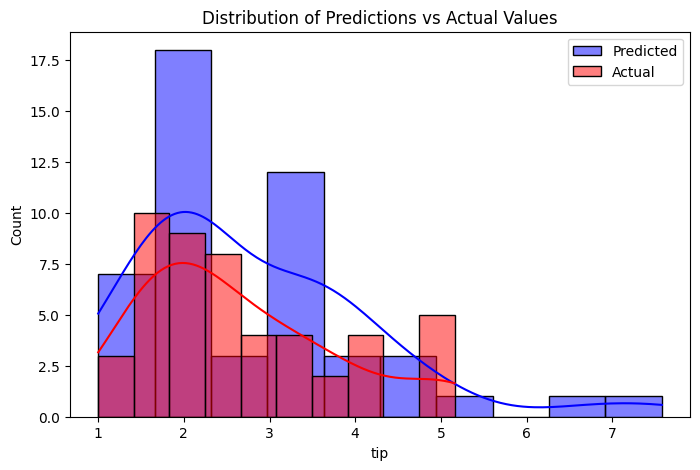

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(y_predL_dc, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test, color='red', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.show()

In [ ]:
#RandomForestRegressor

In [ ]:
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
rf.score(x_train, y_train)

0.9144874165672302

In [ ]:
rf.score(x_test, y_test)

0.27587441352757913

In [ ]:
y_predL_rf=rf.predict(x_test)
print(y_predL_rf)

[2.8506 2.4817 3.7231 3.4506 1.9208 3.2003 4.3733 1.8051 2.2809 2.486
 3.3639 1.9737 1.8471 2.3954 1.6336 2.8806 3.0734 4.0871 2.6182 6.5785
 3.5685 3.2356 2.5176 1.8612 3.721  2.1697 2.0289 3.4214 2.6627 7.2825
 5.6103 2.1797 2.4838 3.2108 2.0612 3.692  1.8861 4.5904 1.9598 3.6423
 1.9759 2.2607 3.6743 2.0816 1.9306 2.0321 2.066  2.8646 1.9632]


In [ ]:
original_values_rf=scaler.inverse_transform(x_test)
print(original_values_rf)

[[1.98200000e+01 1.00000000e+00 0.00000000e+00 2.00000000e+00
  1.00000000e+00 2.00000000e+00]
 [8.77000000e+00 1.00000000e+00 0.00000000e+00 3.00000000e+00
  1.00000000e+00 2.00000000e+00]
 [2.45500000e+01 1.00000000e+00 0.00000000e+00 3.00000000e+00
  1.00000000e+00 4.00000000e+00]
 [2.58900000e+01 1.00000000e+00 1.00000000e+00 2.00000000e+00
  1.00000000e+00 4.00000000e+00]
 [1.30000000e+01 0.00000000e+00 1.00000000e+00 2.22044605e-16
  0.00000000e+00 2.00000000e+00]
 [1.78900000e+01 1.00000000e+00 1.00000000e+00 3.00000000e+00
  1.00000000e+00 2.00000000e+00]
 [2.84400000e+01 1.00000000e+00 1.00000000e+00 2.22044605e-16
  0.00000000e+00 2.00000000e+00]
 [1.24800000e+01 0.00000000e+00 0.00000000e+00 2.22044605e-16
  0.00000000e+00 2.00000000e+00]
 [1.47800000e+01 1.00000000e+00 0.00000000e+00 3.00000000e+00
  1.00000000e+00 2.00000000e+00]
 [1.53800000e+01 0.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 2.00000000e+00]
 [1.82900000e+01 1.00000000e+00 0.00000000e+00 3.0

In [ ]:
print(r2_score(y_test, y_predL_rf))

0.27587441352757913


In [ ]:
print(mean_absolute_error(y_test, y_predL_rf))

0.7568122448979597


In [ ]:
print(mean_squared_error(y_test, y_predL_rf))

0.9051362334693893


In [ ]:
print(root_mean_squared_error(y_test, y_predL_rf))

0.9513864795493939


In [ ]:
print(median_absolute_error(y_test, y_predL_rf))

0.5231999999999999


In [ ]:
print(np.sqrt(mean_squared_error(y_test, y_predL_rf)))

0.9513864795493939


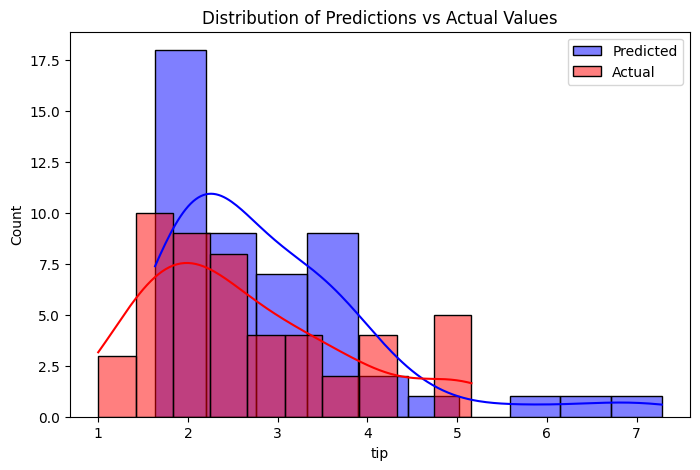

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(y_predL_rf, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test, color='red', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.show()

In [ ]:
#SVR

In [ ]:
svr=SVR()
svr.fit(x_train, y_train)

SVR()

In [ ]:
svr.score(x_train, y_train)

0.555558124844522

In [ ]:
svr.score(x_test, y_test)

0.398786824598207

In [ ]:
y_predL_svr=svr.predict(x_test)
print(y_predL_svr)

[3.01300234 1.91621214 4.07019344 3.32298161 2.16388747 3.1706064
 4.00252705 1.91892082 2.47999236 2.46020939 2.8967571  1.79920687
 1.75258992 2.93973082 1.8469594  3.18274166 3.2493414  3.28792204
 2.57899571 5.02724426 3.50265822 3.10263285 2.47906558 1.68224743
 3.4488806  1.9455576  2.02877998 3.07161448 2.84197204 4.94616789
 5.43771696 1.8341147  2.75577704 2.93019619 3.0917354  4.31717518
 1.96415295 4.23048405 1.98962156 3.08593019 1.77285199 2.14352322
 3.54873142 2.62838944 1.87213362 1.91017887 2.20466771 2.76442536
 1.74752432]


In [ ]:
original_values_svr=scaler.inverse_transform(x_test)
print(original_values_svr)

[[1.98200000e+01 1.00000000e+00 0.00000000e+00 2.00000000e+00
  1.00000000e+00 2.00000000e+00]
 [8.77000000e+00 1.00000000e+00 0.00000000e+00 3.00000000e+00
  1.00000000e+00 2.00000000e+00]
 [2.45500000e+01 1.00000000e+00 0.00000000e+00 3.00000000e+00
  1.00000000e+00 4.00000000e+00]
 [2.58900000e+01 1.00000000e+00 1.00000000e+00 2.00000000e+00
  1.00000000e+00 4.00000000e+00]
 [1.30000000e+01 0.00000000e+00 1.00000000e+00 2.22044605e-16
  0.00000000e+00 2.00000000e+00]
 [1.78900000e+01 1.00000000e+00 1.00000000e+00 3.00000000e+00
  1.00000000e+00 2.00000000e+00]
 [2.84400000e+01 1.00000000e+00 1.00000000e+00 2.22044605e-16
  0.00000000e+00 2.00000000e+00]
 [1.24800000e+01 0.00000000e+00 0.00000000e+00 2.22044605e-16
  0.00000000e+00 2.00000000e+00]
 [1.47800000e+01 1.00000000e+00 0.00000000e+00 3.00000000e+00
  1.00000000e+00 2.00000000e+00]
 [1.53800000e+01 0.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 2.00000000e+00]
 [1.82900000e+01 1.00000000e+00 0.00000000e+00 3.0

In [ ]:
print(r2_score(y_test, y_predL_svr))

0.398786824598207


In [ ]:
print(mean_absolute_error(y_test, y_predL_svr))

0.6704504286798458


In [ ]:
print(mean_squared_error(y_test, y_predL_svr))

0.751499241652713


In [ ]:
print(root_mean_squared_error(y_test, y_predL_svr))

0.8668905592130491


In [ ]:
print(median_absolute_error(y_test, y_predL_svr))

0.5228519943487151


In [ ]:
print(np.sqrt(mean_squared_error(y_test, y_predL_svr)))

0.8668905592130491


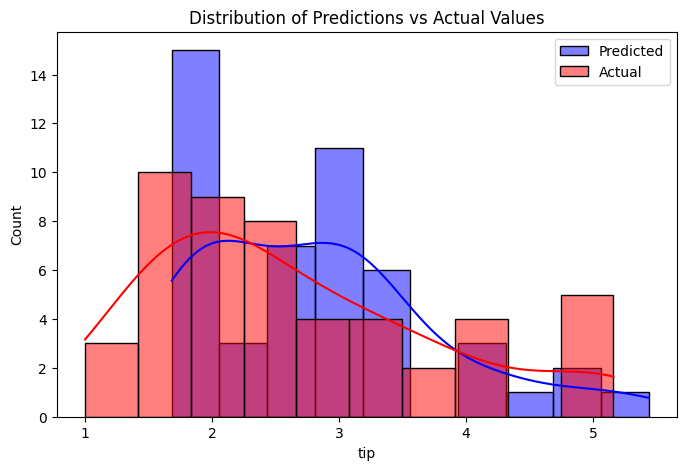

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(y_predL_svr, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test, color='red', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.show()